In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd drive/MyDrive/

/content/drive/MyDrive


In [2]:
import sys
import seaborn as sns
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
pd.set_option('display.max_rows', 10000000000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
np.set_printoptions(threshold=sys.maxsize)
sns.set_theme(style="darkgrid")

In [4]:
def selectRandom(df,n):
  targets = []
  while len(targets) != n:
    row = np.random.randint(len(df))
    if row not in targets:
      targets.append(row)
  targets = sorted(targets)
  return targets
  
def getSelectedRows(df,rows):
  return df.iloc[np.r_[rows],:]

In [5]:
class plotfuncs():

  def __init__(self):
    self.x_data = "s"
    self.y_data = "k"
    self.rating = "r"
    self.level = "level"
    self.action = "action"

  def listfuncs(self):
    print("""
      lmplot scatterplot lineplot
      histplot boxplot jointgrid
      displot relplot lmplotAllInOne
    """)

  def lmplot(self,data):
    sns.lmplot(
        data=data, x=self.x_data, y=self.y_data, 
        col=self.action, hue=self.level,
        col_wrap=2, palette="muted", ci=None,
        height=4, scatter_kws={"s": 50, "alpha": 1}
    )

  def scatterplot(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    sns.despine(f, left=True, bottom=True)
    clarity_ranking = data[self.level].unique()
    sns.scatterplot(x=self.x_data, y=self.y_data,
                    hue=self.level, size=self.action,
                    palette="ch:r=-.2,d=.3_r",
                    hue_order=clarity_ranking,
                    sizes=(1, 8), linewidth=0,
                    data=stackedRow, ax=ax)
    
  def lineplot(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    sns.lineplot(x=self.x_data, y=self.y_data,
                hue=self.level, style=self.action,
                data=data)
    
  def histplot(self,data,xsize,ysize,start,end,step):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    sns.despine(f)
    sns.histplot(
        data,
        x=self.rating, hue=self.level,
        multiple="stack",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
    )
    ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xticks(np.arange(start,end,step))

  def boxplot(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    ax.set_xscale("log")
    sns.boxplot(x=self.rating, y=self.level, data=data,
                whis=[0, 100], width=.6, palette="vlag")

    sns.stripplot(x=self.rating, y=self.level, data=data,
                  size=4, color=".3", linewidth=0)

    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)

  def jointgrid(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    g = sns.JointGrid(data=data, x=self.x_data, y=self.y_data,hue=self.level, space=0, ratio=17)
    g.plot_joint(sns.scatterplot, size=data["r"], sizes=(30, 120),
                color="g", alpha=.6, legend=False)
    g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

  def displot(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    sns.displot(
      data=data,
      x=self.rating, hue=self.level,
      kind="kde", height=6,
      multiple="fill", clip=(0, None),
      palette="ch:rot=-.25,hue=1,light=.75",
    )

  def relplot(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    sns.relplot(x=self.x_data, y=self.y_data, hue=self.level, size=self.action,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
    
  def lmplotAllinOne(self,data,xsize,ysize):
    f, ax = plt.subplots(figsize=(xsize, ysize))
    g = sns.lmplot(
      data=data,
      x=self.x_data, y=self.y_data, hue=self.level,
      height=5
    )

plotfunctions = plotfuncs()

In [6]:
mo = pd.read_csv('bighorse.csv').iloc[:,1:];len(mo)

29601000

In [7]:
df = pd.read_csv("toobig.csv").iloc[:,1:]
len(df)

29601000

In [8]:
def diff(num):
  return len(df[df['r']>=num][df['r']<num+1])-len(mo[mo['r']>=num][mo['r']<num+1])
len(df[df['r']<0.0])-len(mo[mo['r']<0.0])

0

In [9]:
diff(35.0)

<ipython-input-8-db2b274a4b5d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(df[df['r']>=num][df['r']<num+1])-len(mo[mo['r']>=num][mo['r']<num+1])


0

In [12]:
def stackj(no,num):
  one = selectRandom(no[no['r']>=1.0][no['r']<2.0],num)
  rowsOne = getSelectedRows(no[no['r']>=1.0][no['r']<2.0],one)

  two = selectRandom(no[no['r']>=2.0][no['r']<3.0],num)
  rowsTwo = getSelectedRows(no[no['r']>=2.0][no['r']<3.0],two)

  three = selectRandom(no[no['r']>=3.0][no['r']<4.0],num)
  rowsThree = getSelectedRows(no[no['r']>=3.0][no['r']<4.0],three)

  four = selectRandom(no[no['r']>=4.0][no['r']<5.0],num)
  rowsFour = getSelectedRows(no[no['r']>=4.0][no['r']<5.0],four)

  five = selectRandom(no[no['r']>=5.0][no['r']<6.0],num)
  rowsFive = getSelectedRows(no[no['r']>=5.0][no['r']<6.0],five)

  six = selectRandom(no[no['r']>=6.0][no['r']<7.0],num)
  rowsSix = getSelectedRows(no[no['r']>=6.0][no['r']<7.0],six)

  seven = selectRandom(no[no['r']>=7.0][no['r']<8.0],num)
  rowsSeven = getSelectedRows(no[no['r']>=7.0][no['r']<8.0],seven)

  eight = selectRandom(no[no['r']>=8.0][no['r']<9.0],num)
  rowsEight = getSelectedRows(no[no['r']>=8.0][no['r']<9.0],eight)

  nine = selectRandom(no[no['r']>=9.0][no['r']<10.0],num)
  rowsNine = getSelectedRows(no[no['r']>=9.0][no['r']<10.0],nine)

  ten = selectRandom(no[no['r']>=10.0][no['r']<11.0],num)
  rowsTen = getSelectedRows(no[no['r']>=10.0][no['r']<11.0],ten)

  eleven = selectRandom(no[no['r']>=11.0][no['r']<12.0],num)
  rowsEleven = getSelectedRows(no[no['r']>=11.0][no['r']<12.0],eleven)

  twelve = selectRandom(no[no['r']>=12.0][no['r']<13.0],num)
  rowsTwelve = getSelectedRows(no[no['r']>=12.0][no['r']<13.0],twelve)

  stackedRow = pd.concat([rowsOne,rowsTwo,rowsThree,rowsFour,
                              rowsFive,rowsSix,rowsSeven,
                              rowsEight,rowsNine,rowsTen,
                          rowsEleven,rowsTwelve],ignore_index=True)
  return stackedRow

In [14]:
stackedRow = stackj(df,122)

<ipython-input-12-c30ecd9c7538>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one = selectRandom(no[no['r']>=1.0][no['r']<2.0],num)
<ipython-input-12-c30ecd9c7538>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowsOne = getSelectedRows(no[no['r']>=1.0][no['r']<2.0],one)
<ipython-input-12-c30ecd9c7538>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  two = selectRandom(no[no['r']>=2.0][no['r']<3.0],num)
<ipython-input-12-c30ecd9c7538>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowsTwo = getSelectedRows(no[no['r']>=2.0][no['r']<3.0],two)
<ipython-input-12-c30ecd9c7538>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  three = selectRandom(no[no['r']>=3.0][no['r']<4.0],num)
<ipython-input-12-c30ecd9c7538>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowsThree = getSelectedRows(no[no['r

In [15]:
stackedRow.iloc[np.r_[len(stackedRow)*0.2,len(stackedRow)*0.4,len(stackedRow)*0.6,
                      len(stackedRow)*0.8],:]

,s,k,r,level,action
292,646.0,3218.0,3.981,m,聚勢推溪流
585,901.0,6016.0,5.677,m,波濤似平穩
878,483.0,4443.0,8.199,m,浮沉起強滔
1171,804.0,8982.0,10.172,g,大壩回四方


In [16]:
stackedRow['action'].unique()

array(['點滴難開源', '運到未渠成', '聚勢推溪流', '細綿可長久', '波濤似平穩', '滾滾潛長江', '石涌激浪花',
       '浮沉起強滔', '黃河奔快哉', '大壩回四方'], dtype=object)

In [17]:
plotfunctions.listfuncs()


      lmplot scatterplot lineplot
      histplot boxplot jointgrid
      displot relplot lmplotAllInOne
    


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 28404 (\N{CJK UNIFIED IDEOGRAPH-6EF4}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-

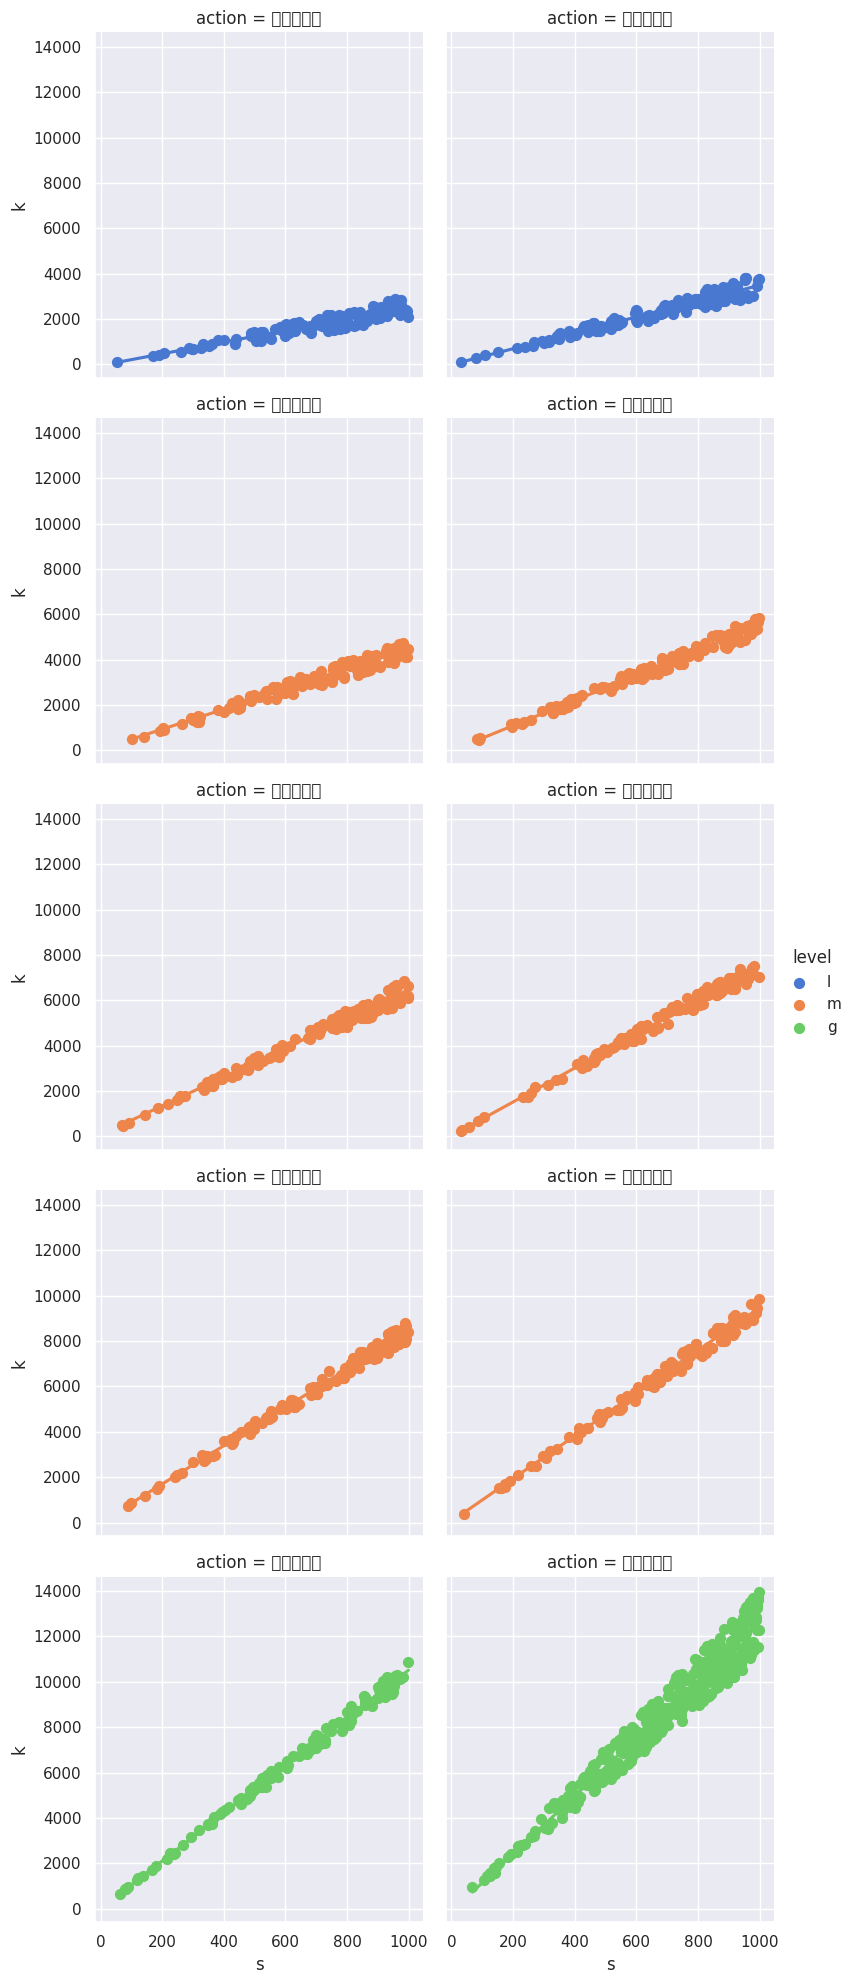

In [18]:
plotfunctions.lmplot(stackedRow)

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28404 (\N{CJK UNIFIED IDEOGRAPH-6EF4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) m

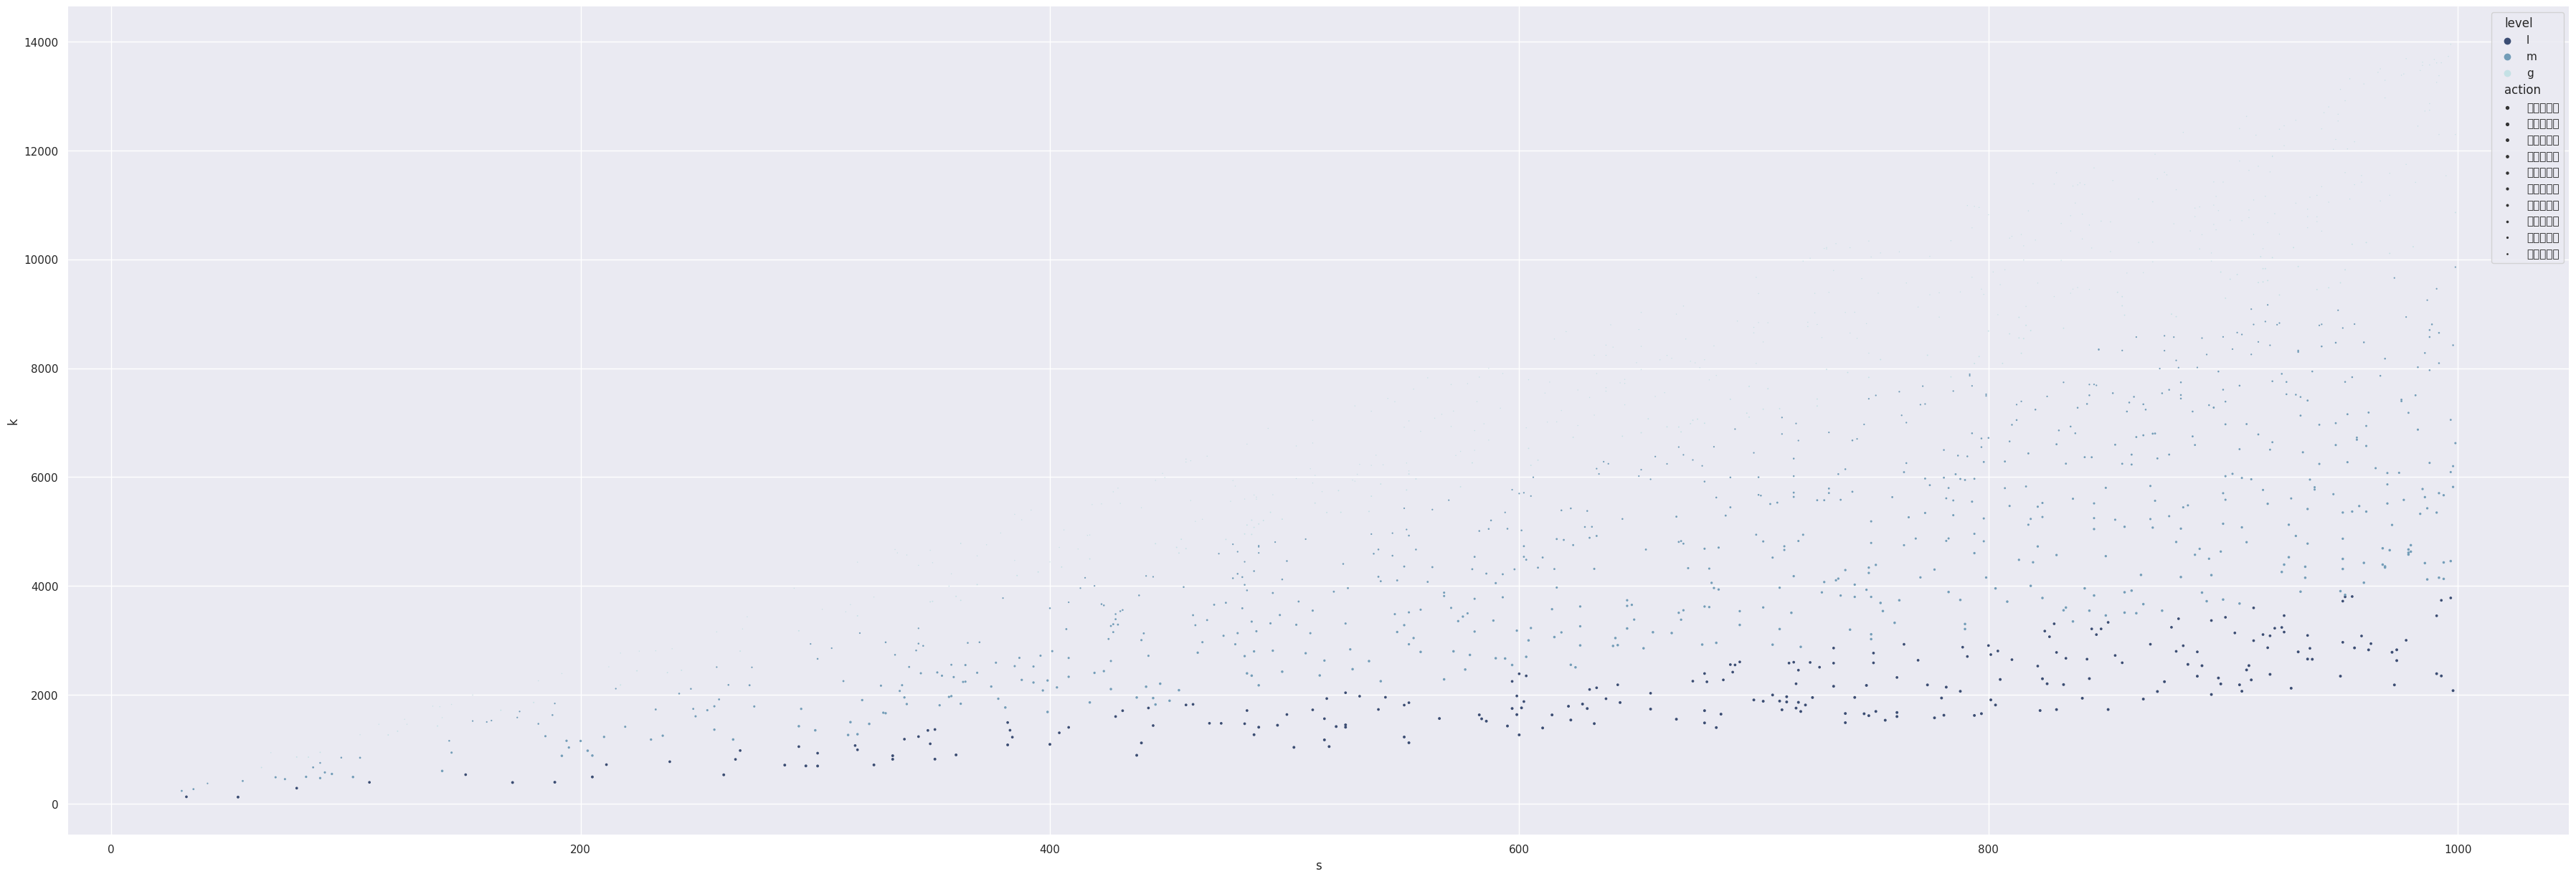

In [19]:
plotfunctions.scatterplot(stackedRow,45,15)

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28404 (\N{CJK UNIFIED IDEOGRAPH-6EF4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) m

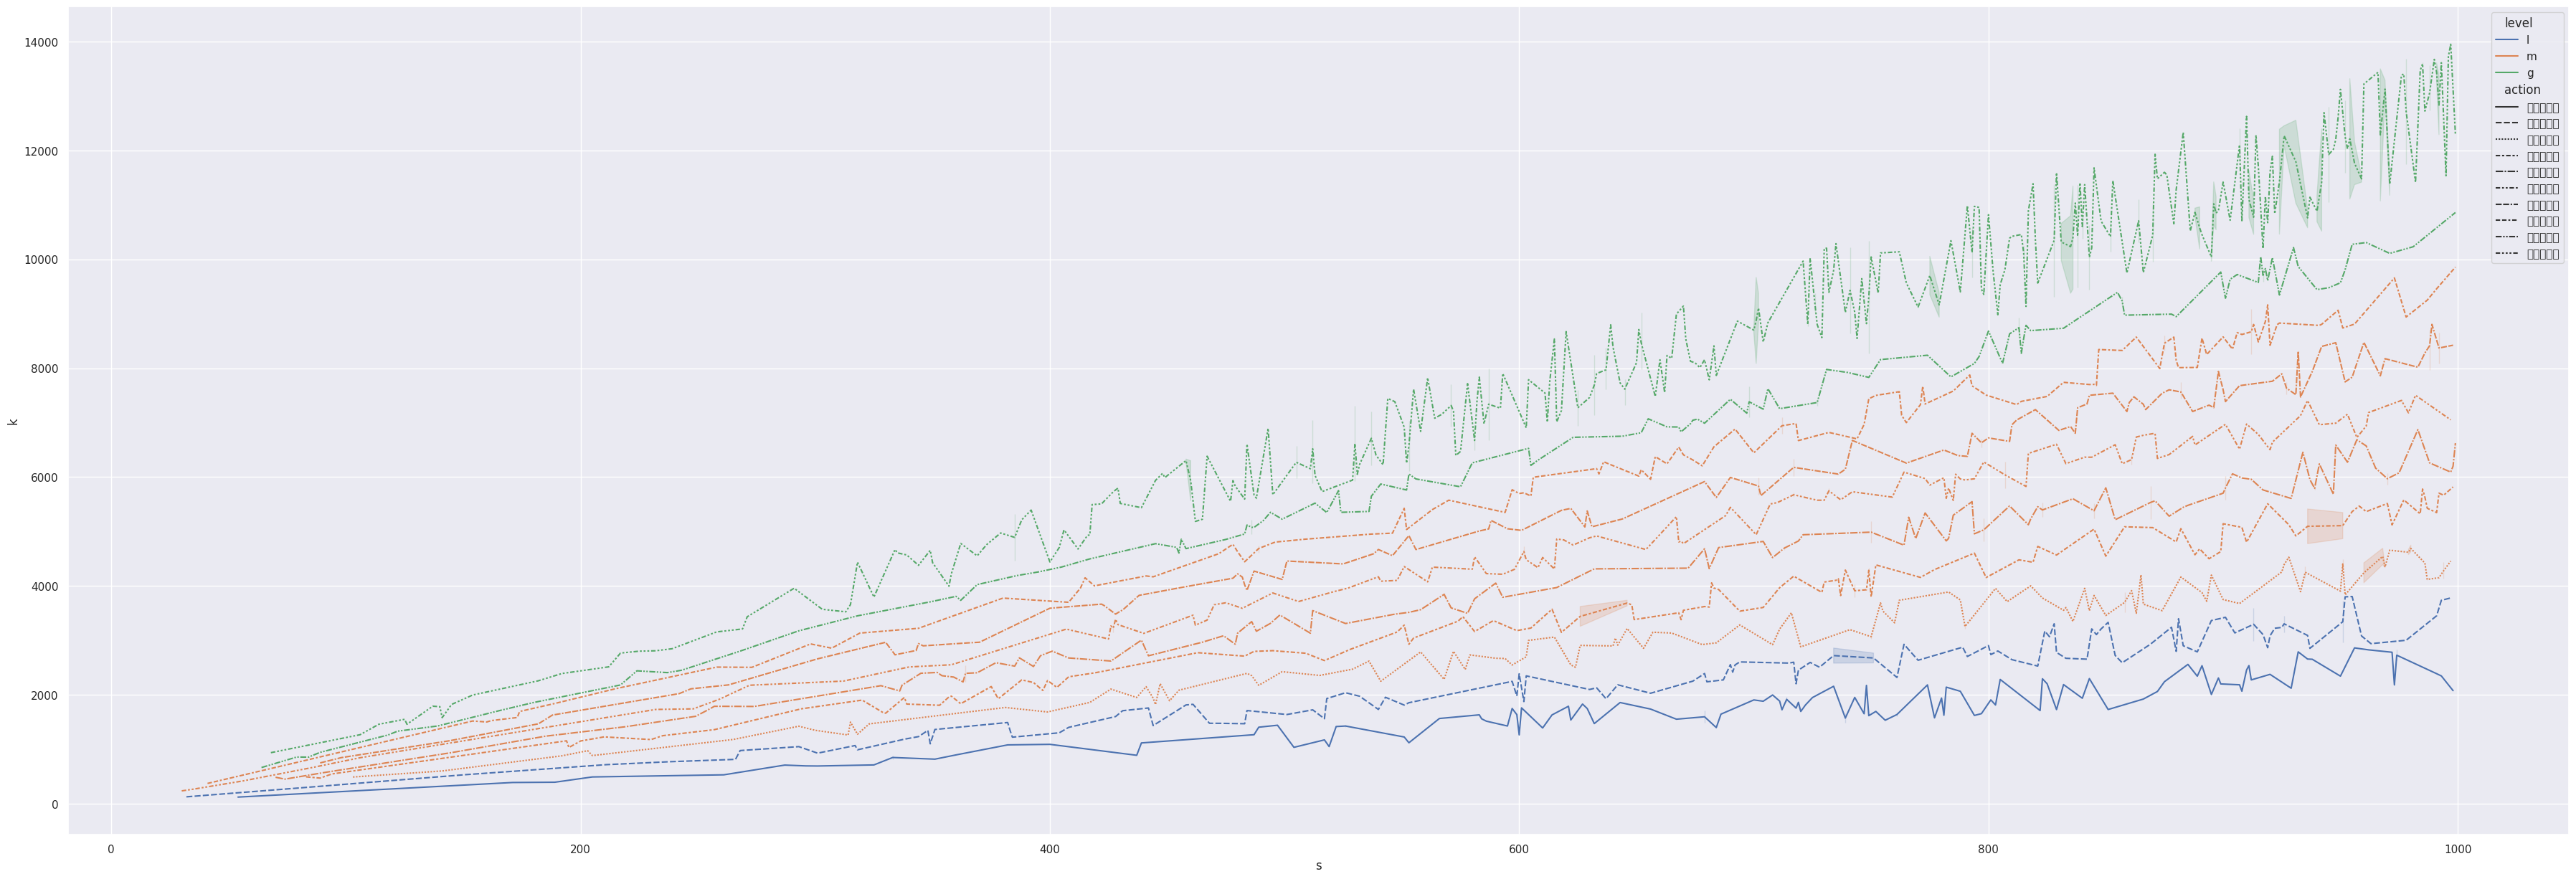

In [20]:
plotfunctions.lineplot(stackedRow,45,15)

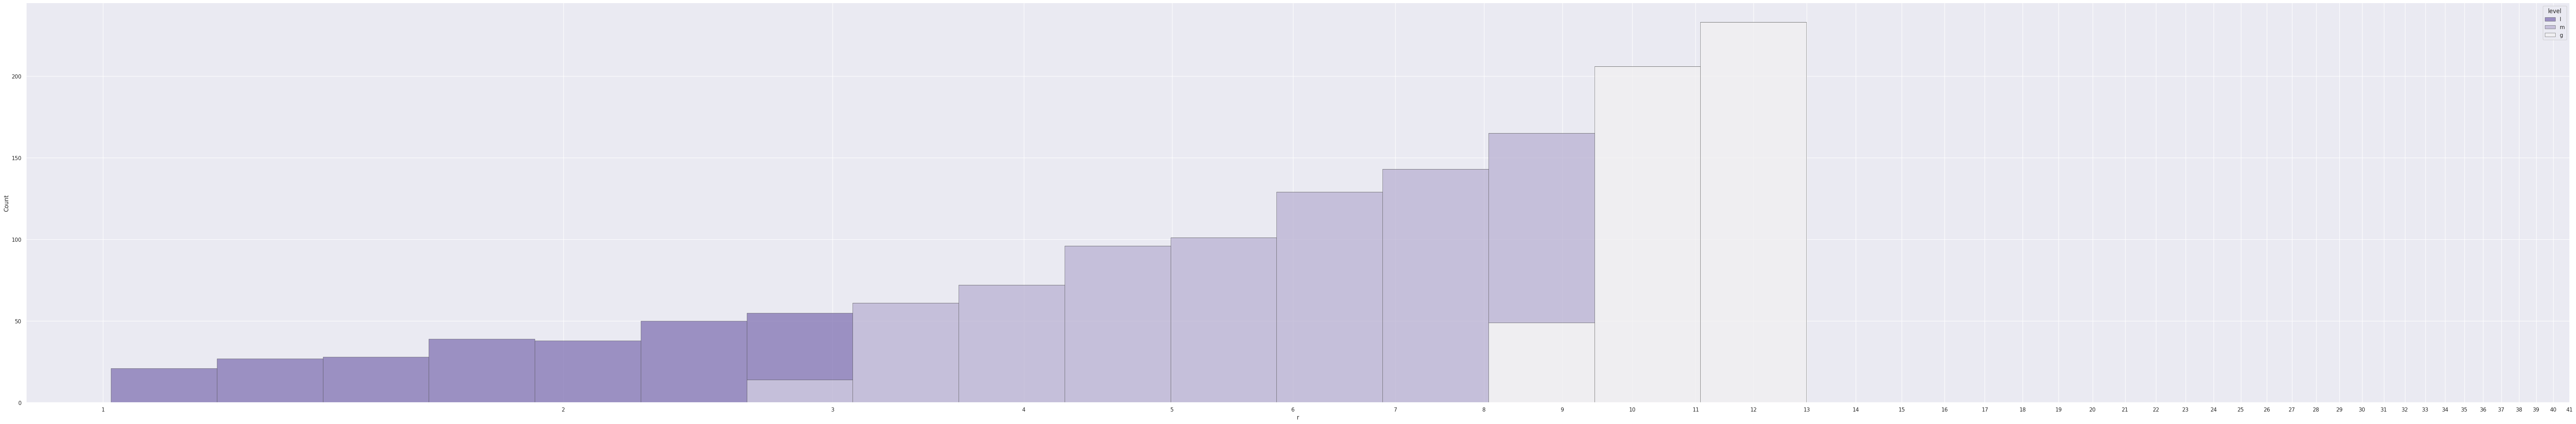

In [21]:
plotfunctions.histplot(stackedRow,95,15,1.0,42.0,1)

In [22]:
df.sort_values(by=['r'])[mo['level']=='g'].median()

<ipython-input-22-b8cdf1e4eb2b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by=['r'])[mo['level']=='g'].median()
<ipython-input-22-b8cdf1e4eb2b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sort_values(by=['r'])[mo['level']=='g'].median()


s      456.000
k    17522.500
r       34.612
dtype: float64

In [23]:
df.sort_values(by=['r'])[mo['level']=='l'].median()

<ipython-input-23-9a4daa634867>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by=['r'])[mo['level']=='l'].median()
<ipython-input-23-9a4daa634867>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sort_values(by=['r'])[mo['level']=='l'].median()


s     714.000
k    1241.000
r       1.096
dtype: float64

In [24]:
df.sort_values(by=['r'])[mo['level']=='m'].median()

<ipython-input-24-209c04f68fde>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by=['r'])[mo['level']=='m'].median()
<ipython-input-24-209c04f68fde>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sort_values(by=['r'])[mo['level']=='m'].median()


s     707.0
k    4521.0
r       6.0
dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


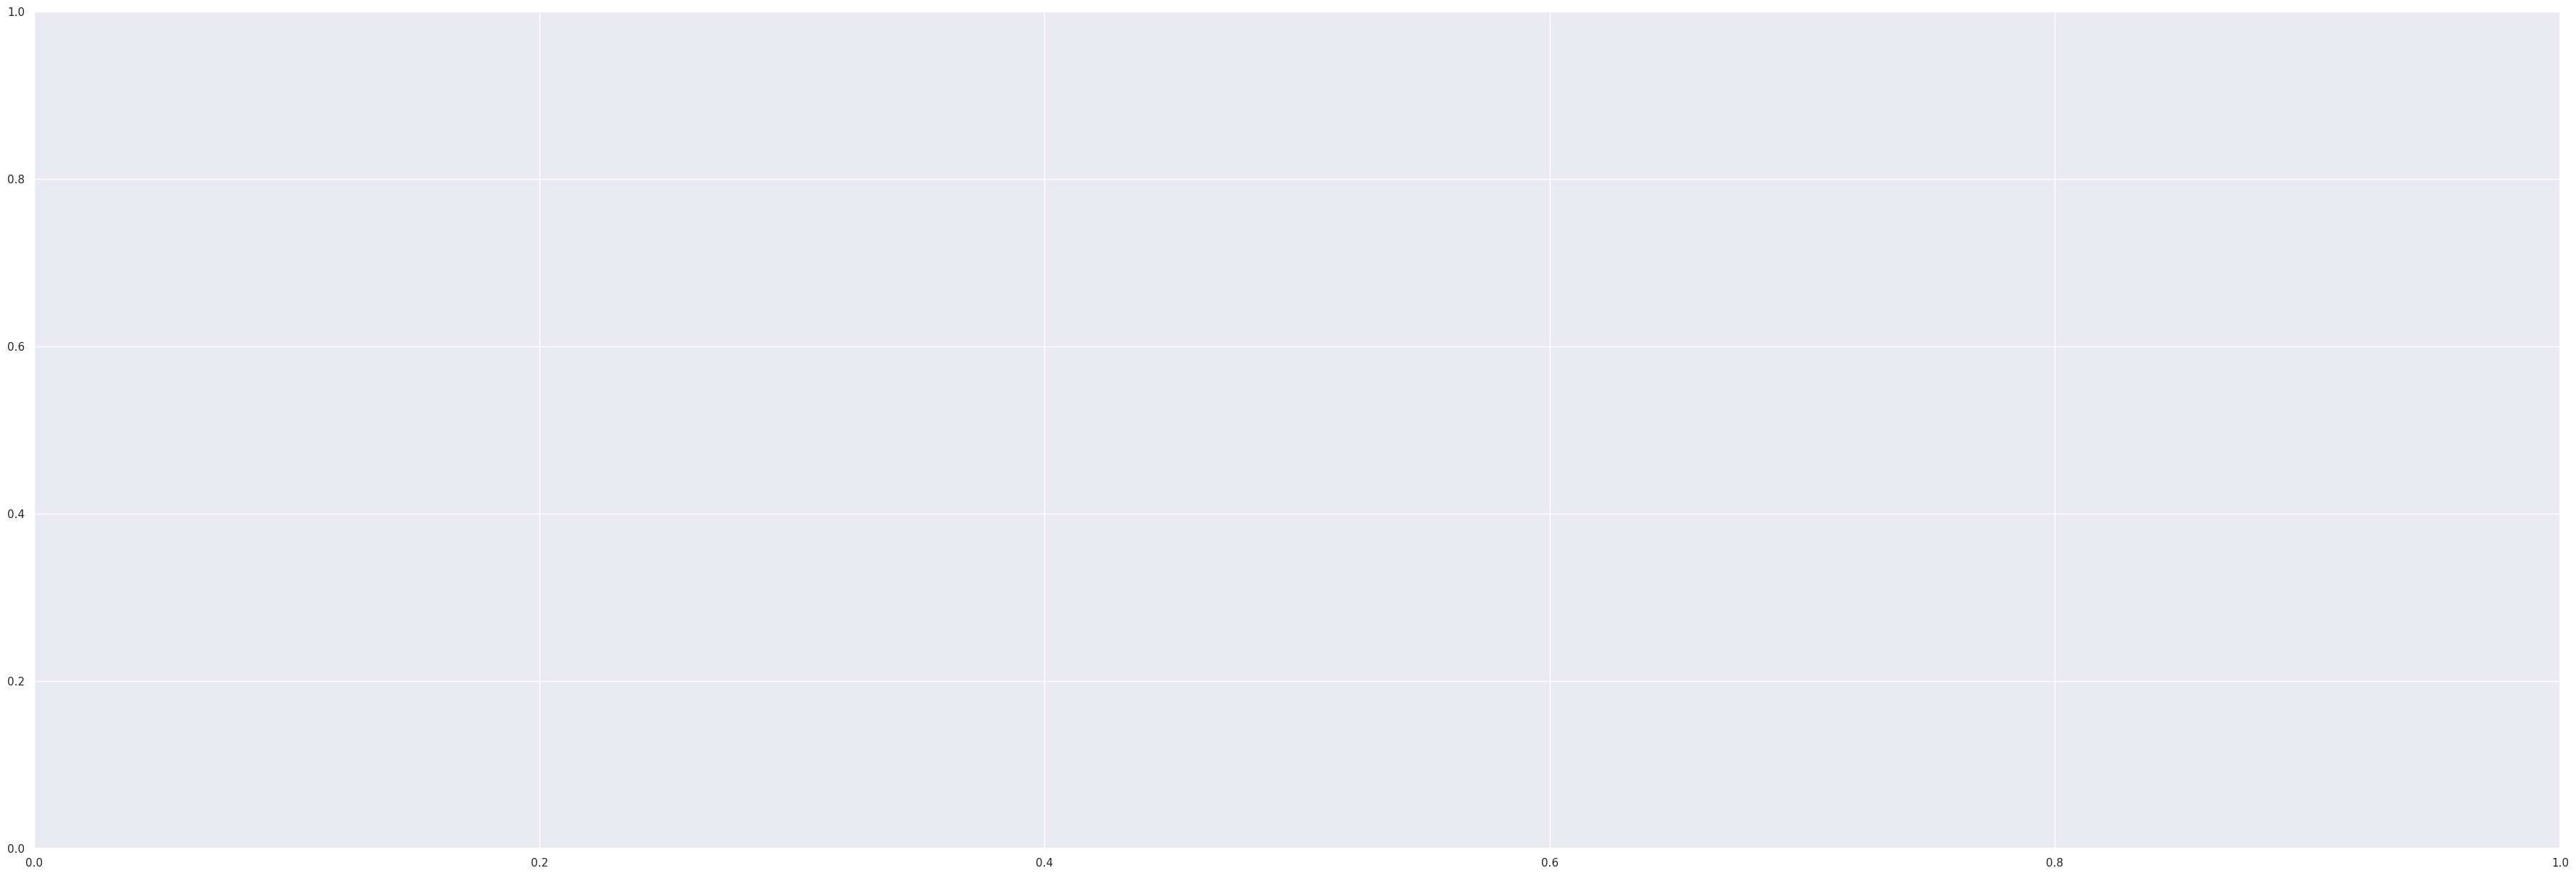

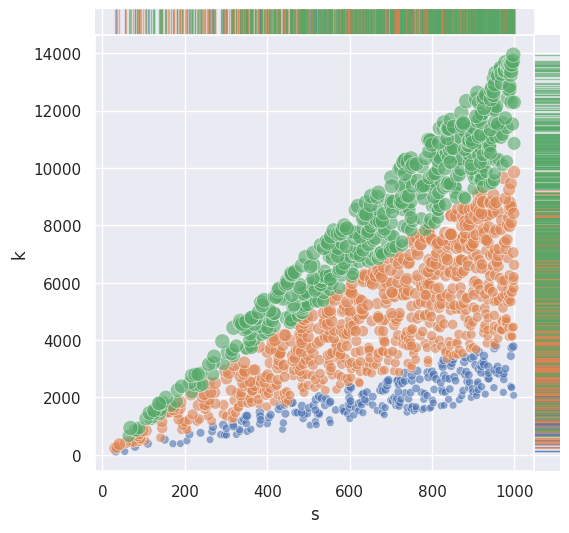

In [25]:
plotfunctions.jointgrid(stackedRow,45,15)

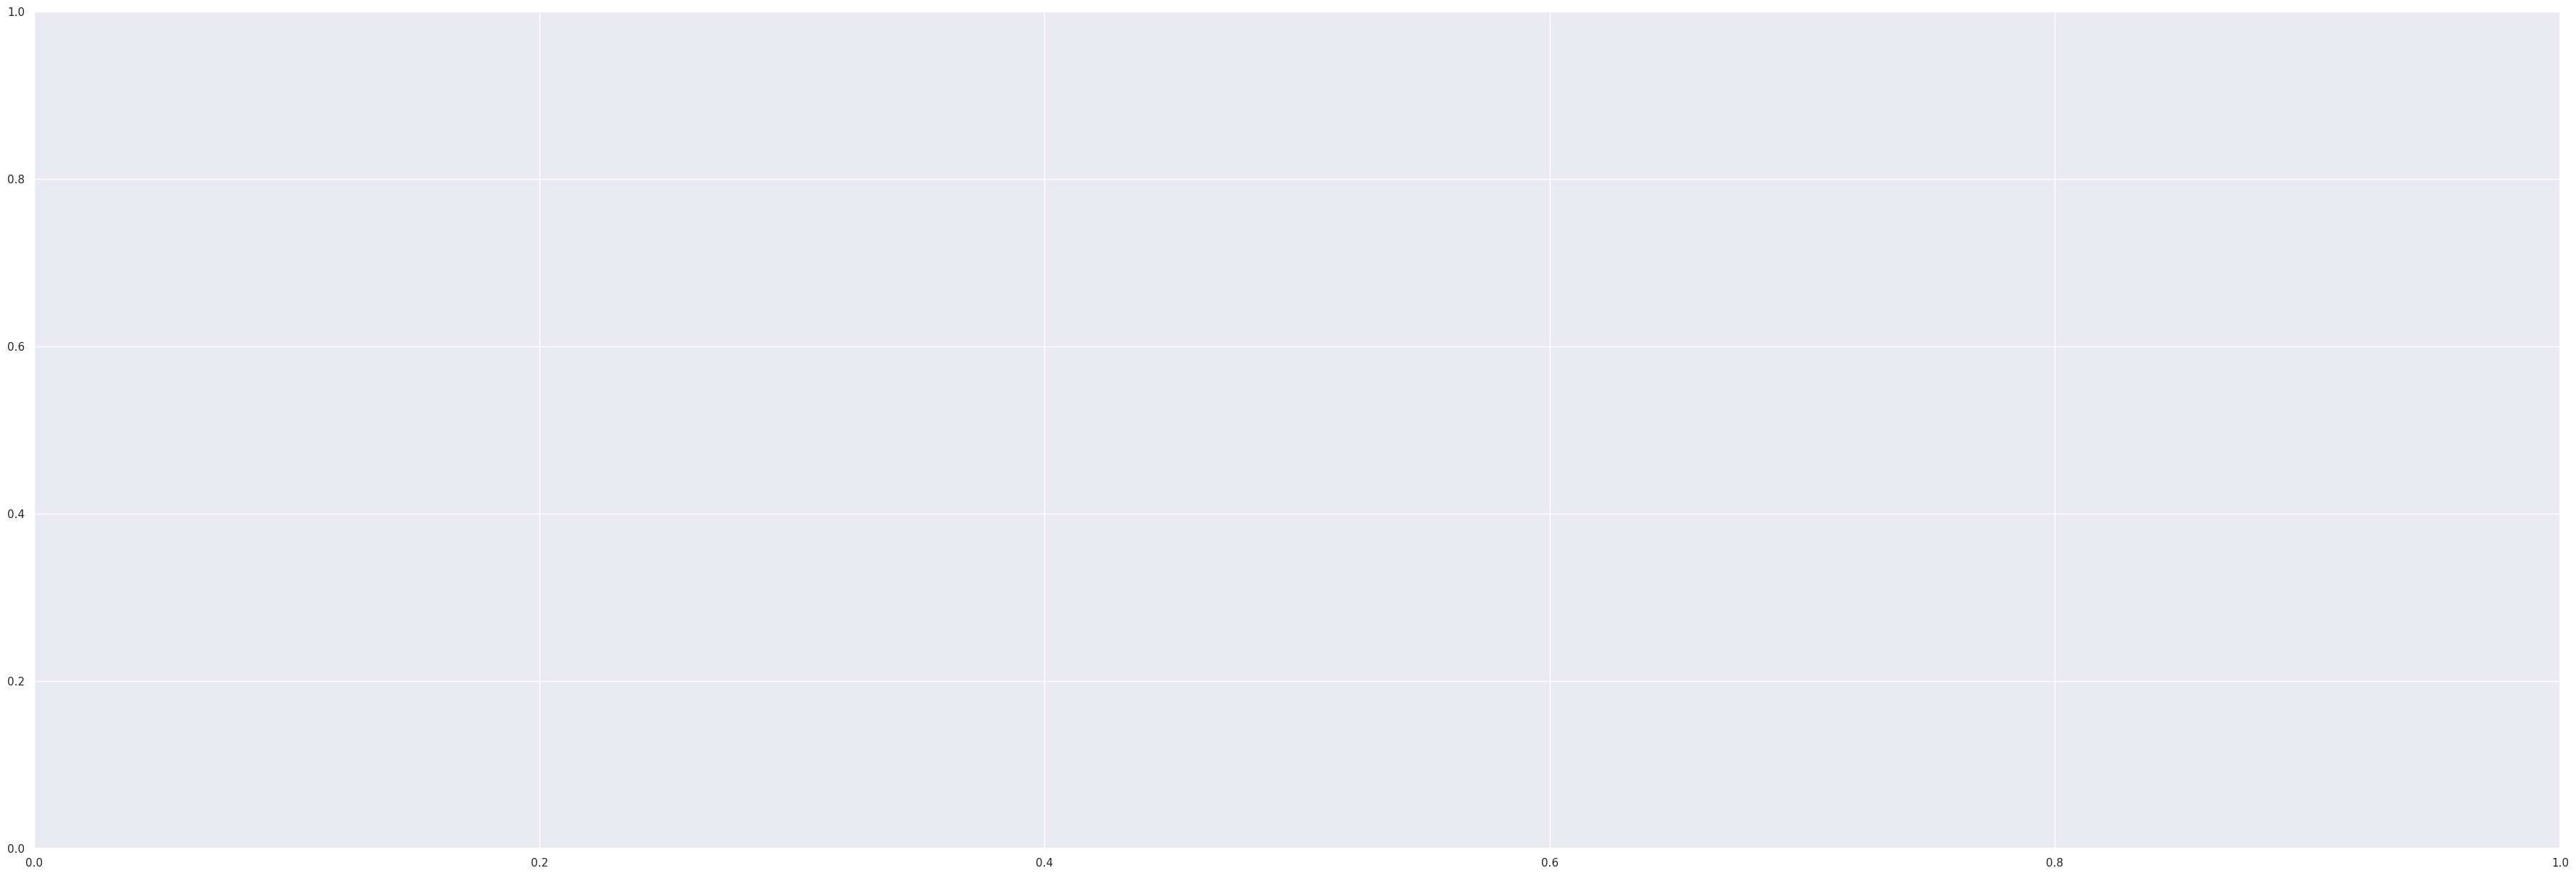

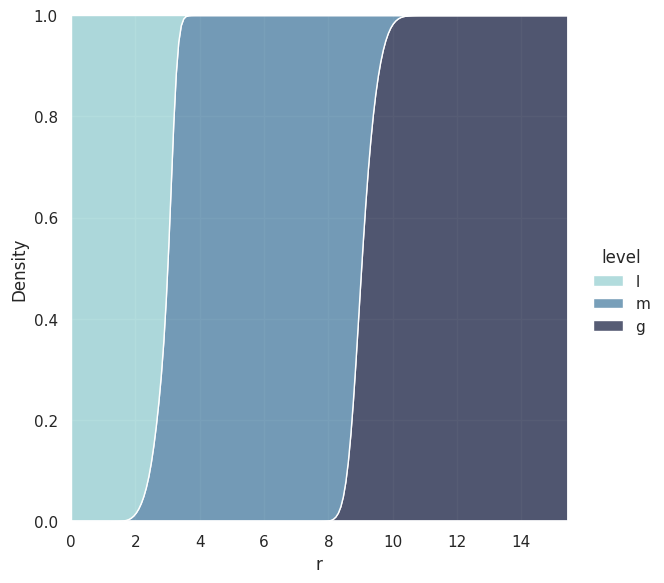

In [26]:
plotfunctions.displot(stackedRow,45,15)

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 28404 (\N{CJK UNIFIED IDEOGRAPH-6EF4}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.draw()
/usr/local

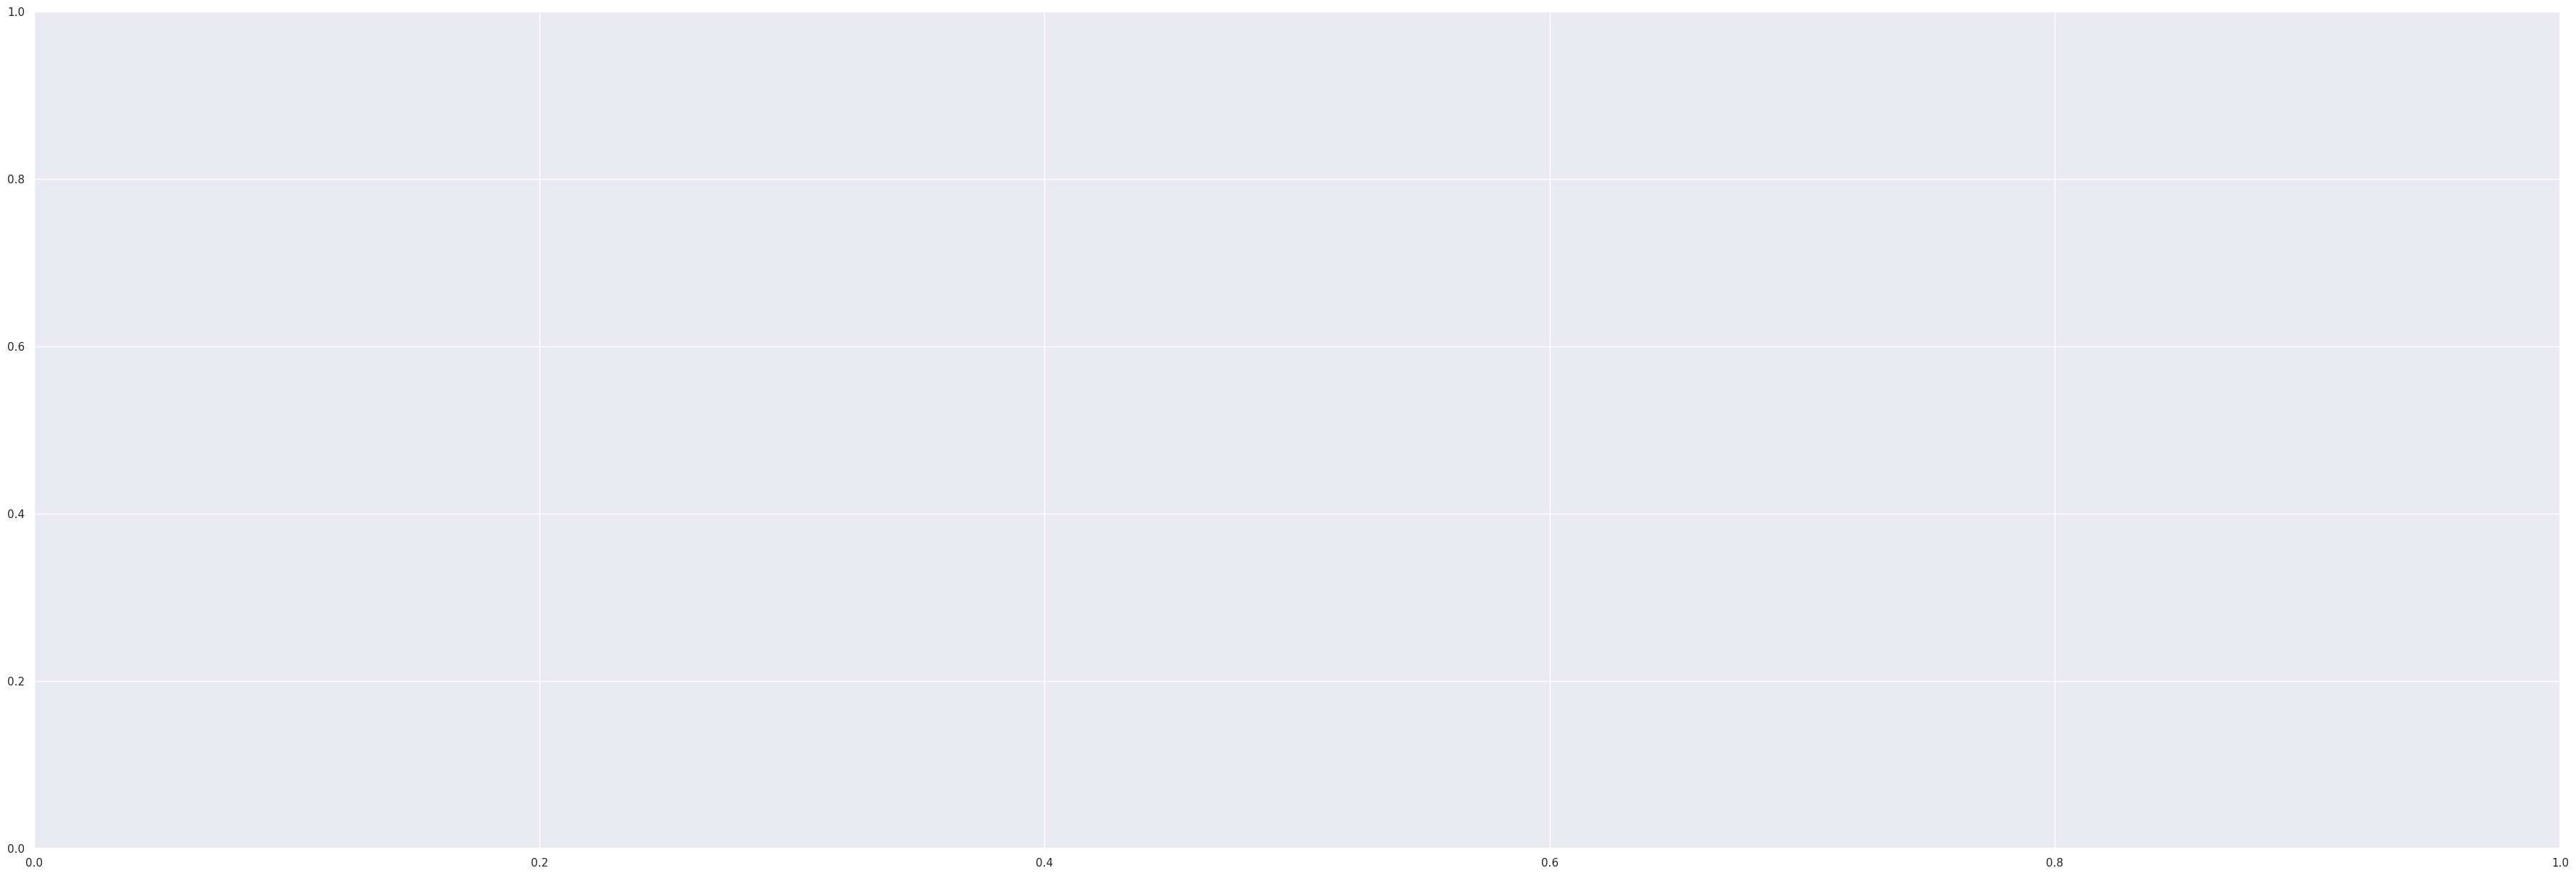

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28404 (\N{CJK UNIFIED IDEOGRAPH-6EF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

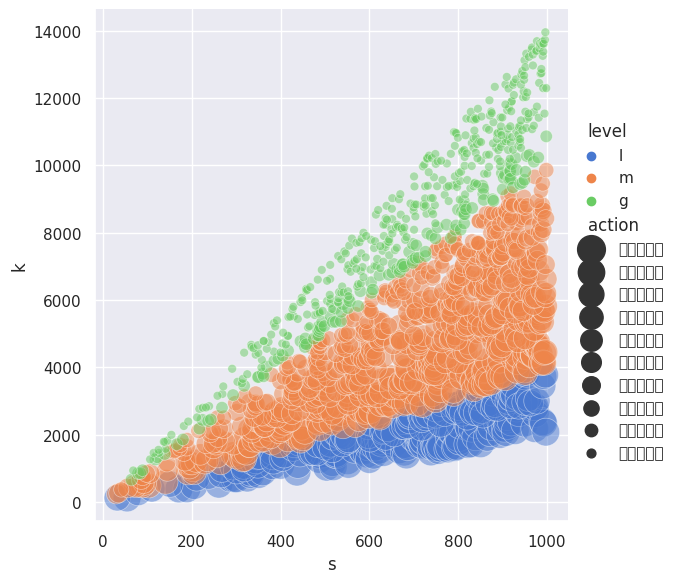

In [27]:
plotfunctions.relplot(stackedRow,45,15)

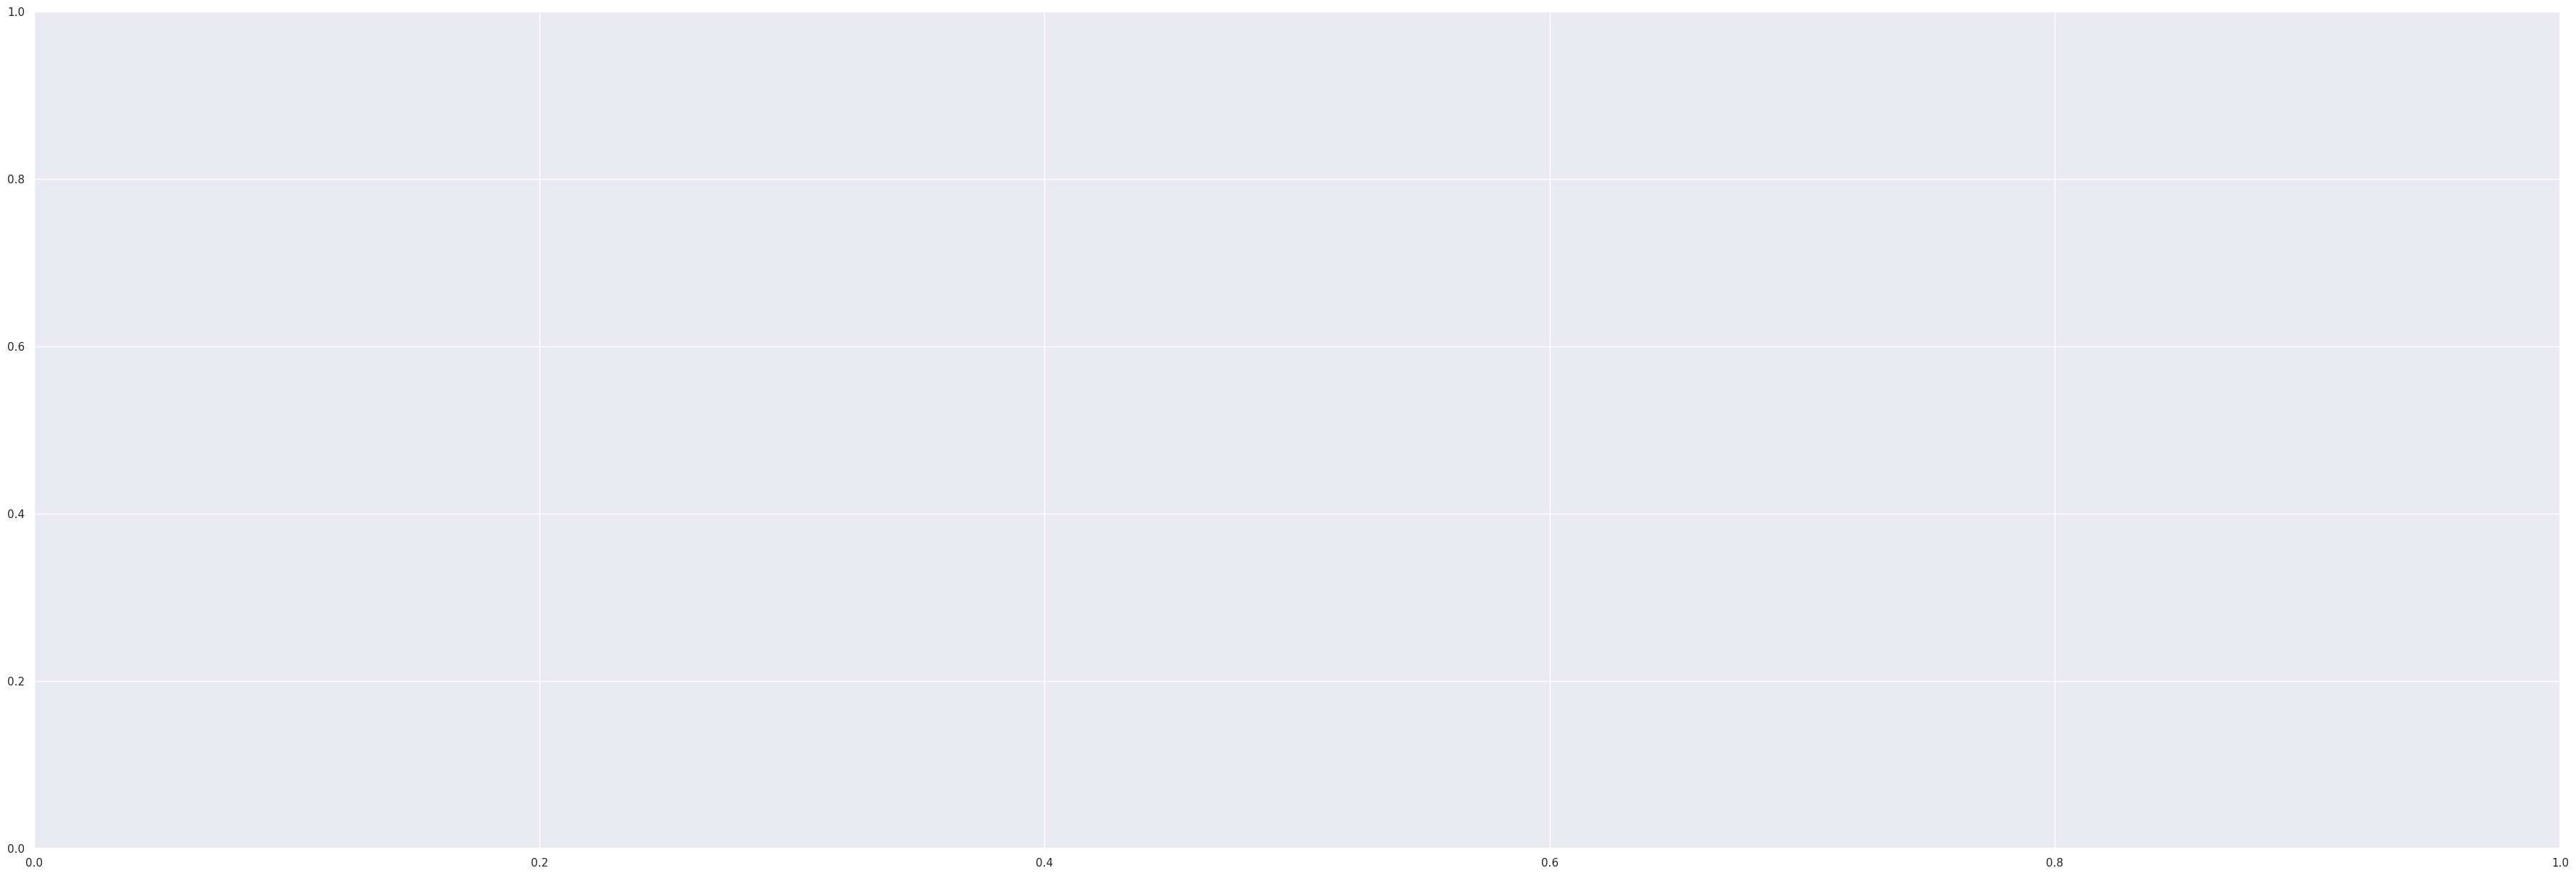

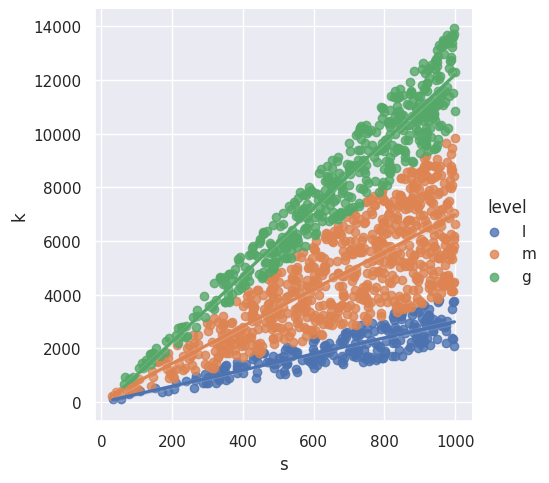

In [28]:
plotfunctions.lmplotAllinOne(stackedRow,45,15)

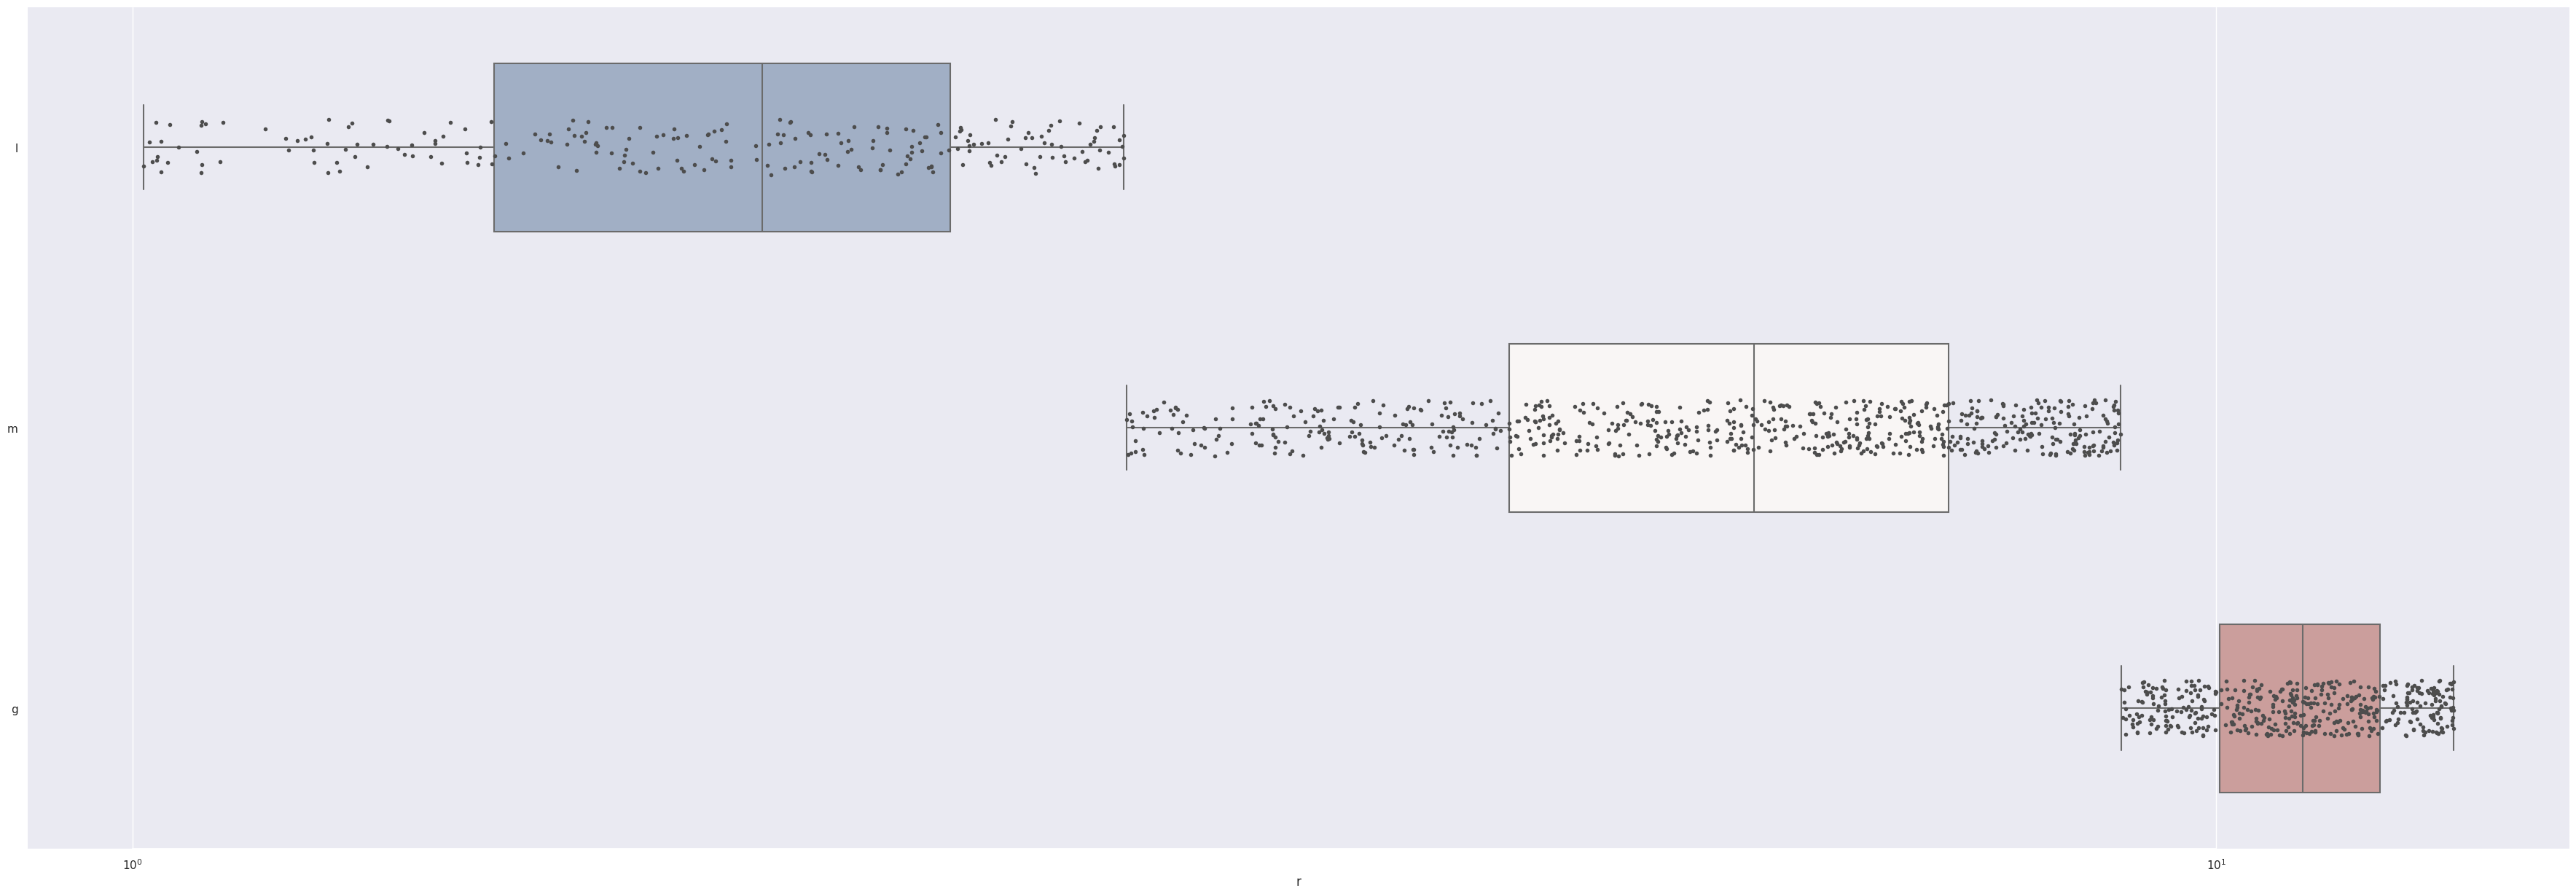

In [29]:
plotfunctions.boxplot(stackedRow,45,15)